In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier

In [2]:
train = pd.read_excel('train_agriculture.xlsx')
test = pd.read_excel('test_agriculture.xlsx')

In [3]:
train

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [4]:
test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [5]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [6]:
test.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1080.000000,1199.000000,1199.000000
mean,1288.737281,0.194329,0.455379,2.383653,26.555463,29.033333,7.052544,1.881568
std,845.004912,0.395848,0.498213,0.522866,16.154101,12.782083,8.863634,0.685640
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,677.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1056.000000,0.000000,0.000000,2.000000,20.000000,28.000000,3.000000,2.000000
75%,1785.000000,0.000000,1.000000,3.000000,40.000000,38.000000,13.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,90.000000,64.000000,42.000000,3.000000


In [7]:
train.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [8]:
test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [9]:
train.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.264944
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [10]:
test.skew()

Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.209152
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64

In [11]:
test.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

In [12]:
train['Crop_Type'].unique()

array([1, 0], dtype=int64)

In [13]:
train['Soil_Type'].unique()

array([0, 1], dtype=int64)

In [14]:
train['Pesticide_Use_Category'].unique()

array([1, 3, 2], dtype=int64)

In [15]:
train['Season'].unique()

array([1, 2, 3], dtype=int64)

In [16]:
train['Crop_Damage'].unique()

array([0, 1, 2], dtype=int64)

In [17]:
train.drop(['ID'],axis =1,inplace=True)

In [18]:
train

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,NaN,1,1,1
4595,2139,0,1,2,30,47.0,2,1,1
4596,2267,0,1,2,10,7.0,27,2,0
4597,2267,0,1,2,10,20.0,24,2,0


In [19]:
test.drop(['ID'],axis =1,inplace=True)

In [20]:
test

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,NaN,0,2
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...
1194,1132,0,1,2,40,34.0,7,3
1195,1132,0,1,2,40,25.0,3,1
1196,1132,0,1,2,20,13.0,23,1
1197,1212,0,1,2,10,35.0,5,1


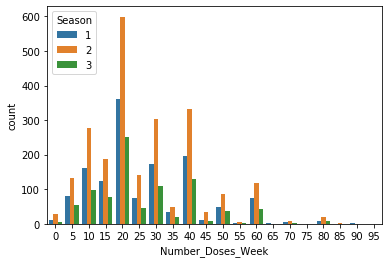

In [21]:
sns.countplot(x='Number_Doses_Week',data=train,hue='Season')

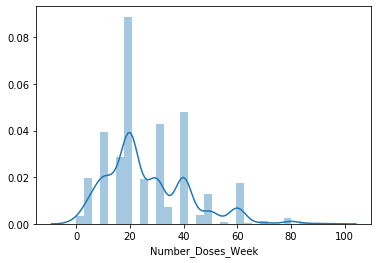

In [22]:
sns.distplot(train['Number_Doses_Week'])

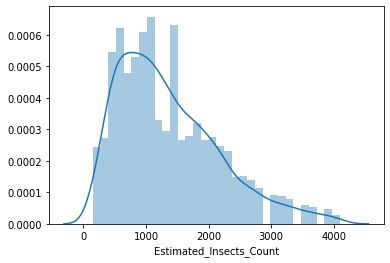

In [23]:
sns.distplot(train['Estimated_Insects_Count'])

In [24]:
train.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [25]:
train.replace(np.NaN,train['Number_Weeks_Used'].mean(),inplace=True)

In [26]:
test.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [27]:
train["Number_Weeks_Used"].value_counts

<bound method IndexOpsMixin.value_counts of 0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
          ...    
4594    28.891027
4595    47.000000
4596     7.000000
4597    20.000000
4598    33.000000
Name: Number_Weeks_Used, Length: 4599, dtype: float64>

In [28]:
train.dropna(inplace=True)

In [29]:
test.dropna(inplace=True)

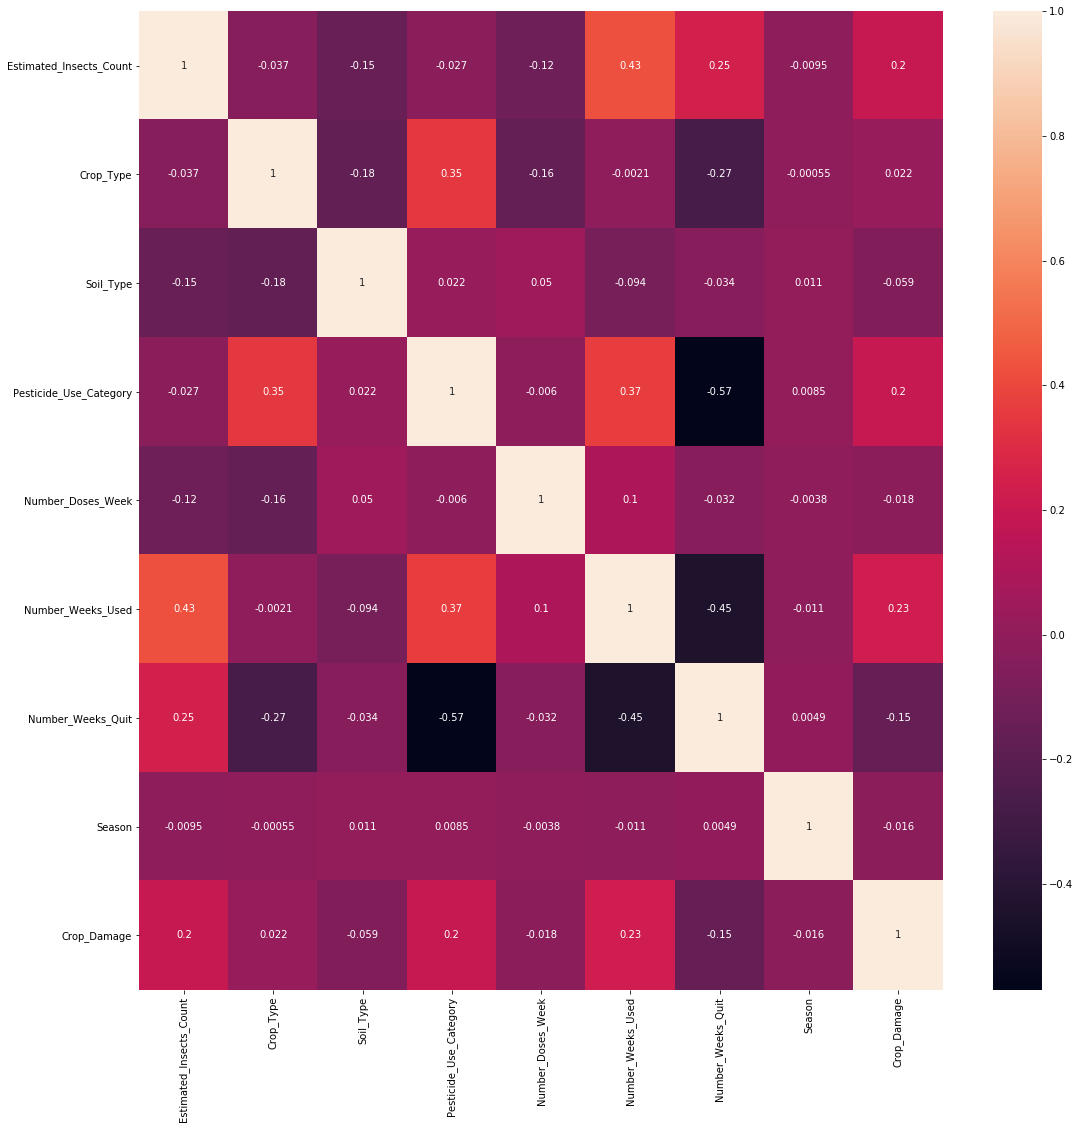

In [30]:
plt.figure(figsize=(18,18))
sns.heatmap(train.corr(),annot= True)
plt.show()

In [31]:
train.shape

(4599, 9)

In [32]:
test.shape

(1080, 8)

In [33]:
from scipy.stats import zscore
z = np.abs(zscore(train))
z
print(train.shape)
train1=train.loc[(z<3).all(axis=1)]
print(train1.shape)

(4599, 9)
(4370, 9)


In [34]:
from scipy.stats import zscore
z = np.abs(zscore(test))
z
print(test.shape)
test1=test.loc[(z<3).all(axis=1)]
print(test1.shape)

(1080, 8)
(1043, 8)


In [35]:
agri = train1.append(test1)

In [36]:
agri

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0.0
1,209,1,0,1,0,0.0,0,2,1.0
2,257,1,0,1,0,0.0,0,2,1.0
3,257,1,1,1,0,0.0,0,2,1.0
4,342,1,0,1,0,0.0,0,2,1.0
...,...,...,...,...,...,...,...,...,...
1192,1132,0,1,2,60,14.0,23,2,NaN
1194,1132,0,1,2,40,34.0,7,3,NaN
1195,1132,0,1,2,40,25.0,3,1,NaN
1196,1132,0,1,2,20,13.0,23,1,NaN


In [37]:
agri.tail()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
1192,1132,0,1,2,60,14.0,23,2,NaN
1194,1132,0,1,2,40,34.0,7,3,NaN
1195,1132,0,1,2,40,25.0,3,1,NaN
1196,1132,0,1,2,20,13.0,23,1,NaN
1197,1212,0,1,2,10,35.0,5,1,NaN


In [38]:
 x = train1.drop('Crop_Damage',axis=1)

In [39]:
x.shape

(4370, 8)

In [40]:
y = train1["Crop_Damage"]

In [41]:
 df_x = train1.drop('Crop_Damage',axis=1)

In [42]:
x.skew()

Estimated_Insects_Count    0.789806
Crop_Type                  1.308548
Soil_Type                  0.079724
Pesticide_Use_Category     0.753578
Number_Doses_Week          0.711083
Number_Weeks_Used          0.275330
Number_Weeks_Quit          0.813382
Season                     0.141605
dtype: float64

In [43]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
x = pt.fit_transform(x)  
x = pd.DataFrame(x,columns=df_x.columns)
x

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,-2.206932,1.848947,-0.960945,-4.720309,-2.901009,-2.941231,-1.256537,-1.336913
1,-2.112900,1.848947,-0.960945,-4.720309,-2.901009,-2.941231,-1.256537,0.207486
2,-1.919329,1.848947,-0.960945,-4.720309,-2.901009,-2.941231,-1.256537,0.207486
3,-1.919329,1.848947,1.040642,-4.720309,-2.901009,-2.941231,-1.256537,0.207486
4,-1.628579,1.848947,-0.960945,-4.720309,-2.901009,-2.941231,-1.256537,0.207486
...,...,...,...,...,...,...,...,...
4365,1.074801,-0.540848,1.040642,-0.535622,-0.276736,0.070615,-0.814189,-1.336913
4366,1.075725,-0.540848,1.040642,-0.535622,0.411522,1.508387,-0.532160,-1.336913
4367,1.191618,-0.540848,1.040642,-0.535622,-1.176874,-2.005307,1.389555,0.207486
4368,1.191618,-0.540848,1.040642,-0.535622,-1.176874,-0.705622,1.274937,0.207486


In [44]:
x.skew()

Estimated_Insects_Count   -0.041940
Crop_Type                  1.308548
Soil_Type                  0.079724
Pesticide_Use_Category    -0.074091
Number_Doses_Week         -0.017106
Number_Weeks_Used         -0.010728
Number_Weeks_Quit         -0.105256
Season                    -0.043136
dtype: float64

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x,columns=df_x.columns)

In [46]:
x

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,-2.206932,1.848947,-0.960945,-4.720309,-2.901009,-2.941231,-1.256537,-1.336913
1,-2.112900,1.848947,-0.960945,-4.720309,-2.901009,-2.941231,-1.256537,0.207486
2,-1.919329,1.848947,-0.960945,-4.720309,-2.901009,-2.941231,-1.256537,0.207486
3,-1.919329,1.848947,1.040642,-4.720309,-2.901009,-2.941231,-1.256537,0.207486
4,-1.628579,1.848947,-0.960945,-4.720309,-2.901009,-2.941231,-1.256537,0.207486
...,...,...,...,...,...,...,...,...
4365,1.074801,-0.540848,1.040642,-0.535622,-0.276736,0.070615,-0.814189,-1.336913
4366,1.075725,-0.540848,1.040642,-0.535622,0.411522,1.508387,-0.532160,-1.336913
4367,1.191618,-0.540848,1.040642,-0.535622,-1.176874,-2.005307,1.389555,0.207486
4368,1.191618,-0.540848,1.040642,-0.535622,-1.176874,-0.705622,1.274937,0.207486


In [47]:
x.skew()

Estimated_Insects_Count   -0.041940
Crop_Type                  1.308548
Soil_Type                  0.079724
Pesticide_Use_Category    -0.074091
Number_Doses_Week         -0.017106
Number_Weeks_Used         -0.010728
Number_Weeks_Quit         -0.105256
Season                    -0.043136
dtype: float64

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [49]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()


In [50]:
parameters = {"n_neighbors": range(1,20)}
gsc = GridSearchCV(knn,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_neighbors': 16}

In [51]:
parameters = {"n_estimators": range(1,20)}
gsc = GridSearchCV(rfc,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_estimators': 12}

In [59]:
knn =KNeighborsClassifier(n_neighbors=16 )
svc = SVC()
dt= DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators= 12)

In [60]:
models=[]
models.append(("KNeighborsClassifier",knn))
models.append(("SVC",svc))
models.append(("DecisionTreeClassifier",dt))
models.append(("RandomForestClassifier",rfc))

********************* KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')


Accuracy score =  0.8572418572418572


cross_val_score=  0.8254004576659039


roc_auc_score =  0.556366717138943


Classification_Report
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1242
           1       0.46      0.14      0.21       201

    accuracy                           0.86      1443
   macro avg       0.67      0.56      0.57      1443
weighted avg       0.82      0.86      0.82      1443



[[1209   33]
 [ 173   28]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



********************* SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf'

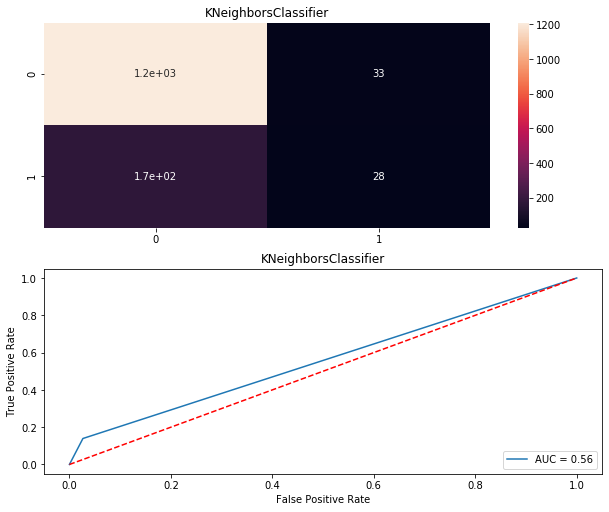

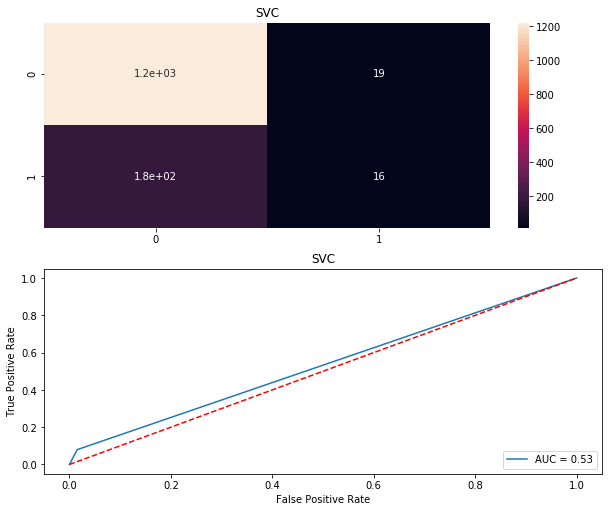

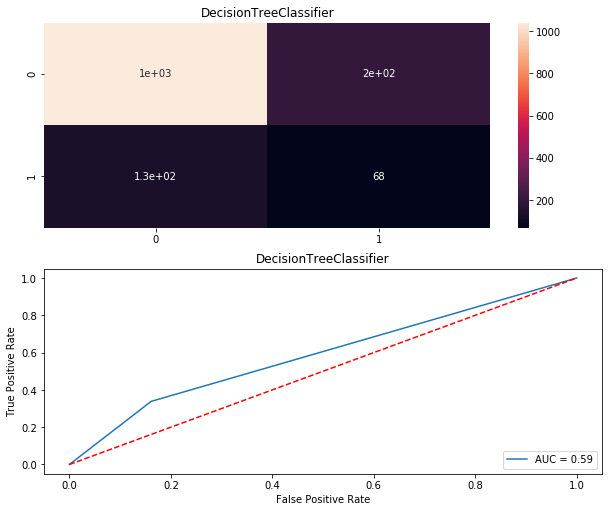

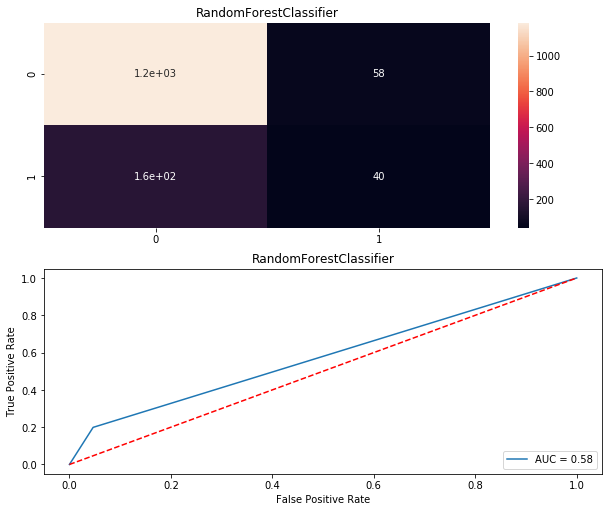

In [61]:
Model =[]
score =[]
cvs=[]
rocscore=[]
for name,model in models:
    print('*********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS = accuracy_score(y_test,pre)
    print("Accuracy score = ",AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model,x,y,cv=10,scoring="accuracy").mean()
    print("cross_val_score= ",sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    print("roc_auc_score = ",roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print("Classification_Report\n",classification_report(y_test,pre))
    print('\n')
    cm = confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot = True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label = "AUC = %0.2f"%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc="lower right")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [62]:
result = pd.DataFrame({"Model": Model,"Accuracy Score":score,"Cross_val_score":cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy Score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,85.724186,82.540046,55.636672
1,SVC,85.862786,83.363844,53.215204
2,DecisionTreeClassifier,76.923077,72.791762,58.863893
3,RandomForestClassifier,84.823285,80.663616,57.615305


In [63]:
from sklearn.externals import joblib

In [64]:
joblib.dump(svc,"Crop Detection.obj")

['Crop Detection.obj']

In [65]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)